In [8]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import json
from config_twitter import consumer_key, consumer_secret, access_token, access_token_secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,parser=tweepy.parsers.JSONParser())
import time

In [9]:
consumer_key

'DXO0bbdDlwl6R0ruG1MZWvbxS'

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


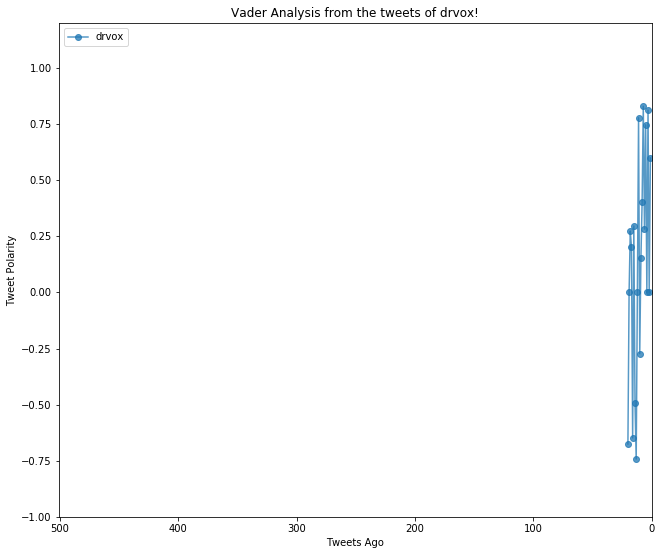

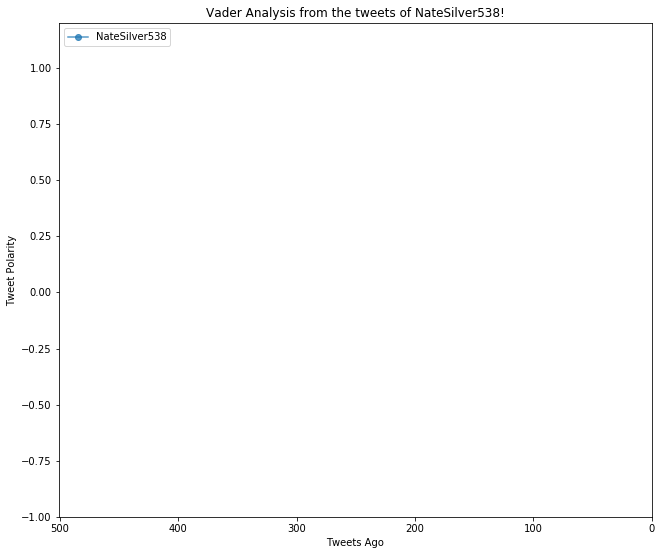

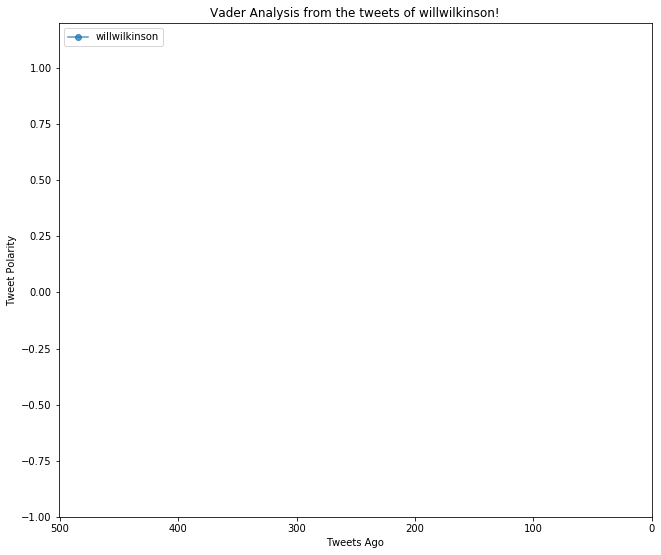

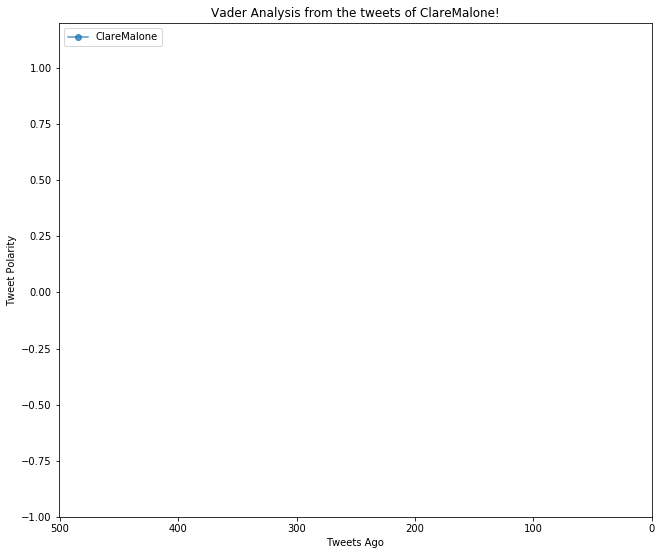

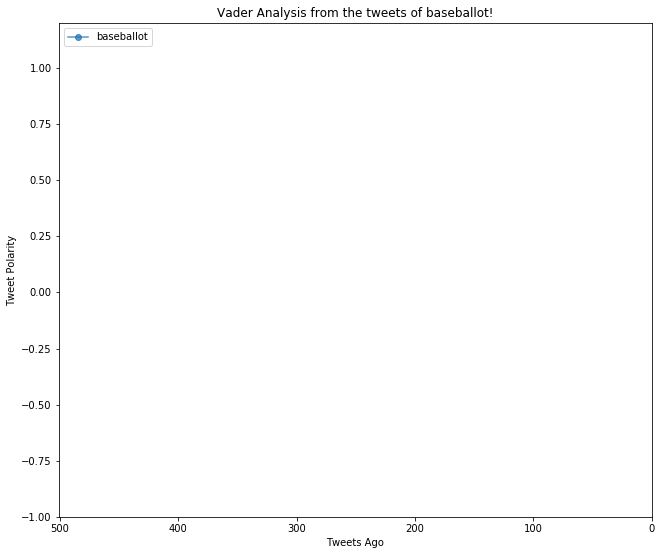

In [41]:


# Target User Accounts
target_user = ("@drvox", "@NateSilver538", "@willwilkinson", "@ClareMalone","@baseballot")


# List for dictionaries of results
results_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_texts = []
time_stamp =[]
user_name= []
df_list=[]

# Loop through each user
for user in target_user:


  
    # Loop through 10 pages of tweets (total 200 tweets)
    for x in range(1, 2):

        # Get all tweets from home feed
            public_tweets = api.user_timeline(user, page=x,tweet_mode='extended')

        # Loop through all tweets
            for tweet in public_tweets:
            
        #Append tweet_text list to read the tweets:
                tweet_texts.append(tweet["full_text"])
                time_stamp.append(tweet["created_at"])
                user_name.append(tweet["user"]["screen_name"]) 
                

        # Run Vader Analysis on each tweet
                results = analyzer.polarity_scores(tweet["full_text"])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]

            # Add each value to the appropriate list
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)
                df = pd.DataFrame(
                {'User Name': user_name,
                'Time Stamp': time_stamp,
                'Text of Tweet': tweet_texts,
                'Compound Score':compound_list,
                'Positive Score':positive_list,
                'Neutral Score': neutral_list,
                'Negative Score':negative_list
     
                })
                nate = df[df['User Name']=='NateSilver538']
                drvox = df[df['User Name']=='drvox']
                clare = df[df['User Name']=='ClareMalone']
                will = df[df['User Name']=='willwilkinson']
                rakich = df[df['User Name']=='baseballot']
                drvox = drvox.reset_index()
                drvox ['Tweets Ago'] = drvox ['index']+1
                drvox = drvox.sort_values(by='Tweets Ago', ascending=False)
                df_list.append(drvox)
                nate = nate.reset_index()
                nate ['Tweets Ago'] = nate ['index']-499
                nate = nate.sort_values(by='Tweets Ago', ascending=False)
                df_list.append(nate)
                will = will.reset_index()
                will ['Tweets Ago'] = will ['index']-999
                will = will.sort_values(by='Tweets Ago', ascending=False)
                df_list.append(will)
                clare = clare.reset_index()
                clare ['Tweets Ago'] = clare ['index']-1499
                clare = clare.sort_values(by='Tweets Ago', ascending=False)
                df_list.append(clare)
                rakich = rakich.reset_index()
                rakich ['Tweets Ago'] = rakich ['index']-1999
                rakich = rakich.sort_values(by='Tweets Ago', ascending=False)
                df_list.append(rakich)
for df in (drvox, nate, will, clare,rakich):
    fig, ax = plt.subplots()
    rects2 = ax.plot(df['Tweets Ago'], df['Compound Score'], marker="o",label=str(df.iloc[1,1]), alpha=0.75)
    ax.set_title(f'Vader Analysis from the tweets of {df.iloc[1,1]}!')
    ax.set_xlabel("Tweets Ago")
    ax.set_ylabel("Tweet Polarity")
    ax.set_xlim(501, 0)
    ax.set_ylim(-1, 1.2)
    ax.legend(loc='upper left')
    fig.tight_layout()
    fig.set_size_inches(10, 9)
    plt.savefig(f'{df.iloc[1,1]} Vader Analysis.png')
    fig.show()
    file = (f'{df.iloc[1,1]} Vader Analysis.png')
    imagePath = file
    status = f'Vader Analysis from @{df.iloc[1,1]}!'
    api.update_with_media(imagePath, status)
    print("Tweeted Succesfully!")
            
                

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


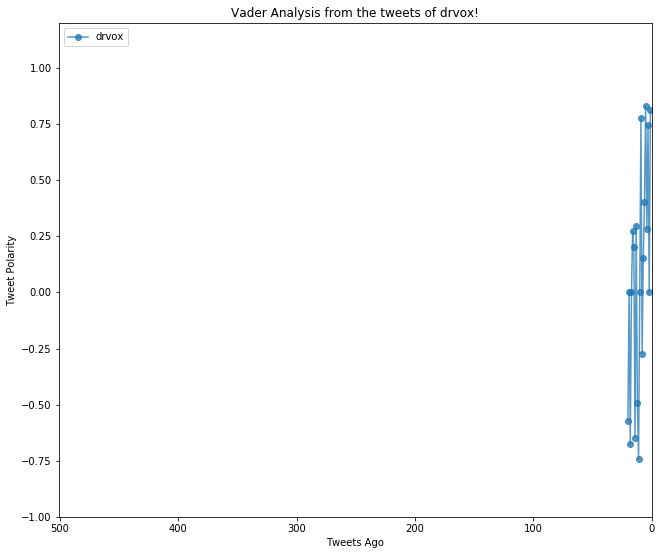

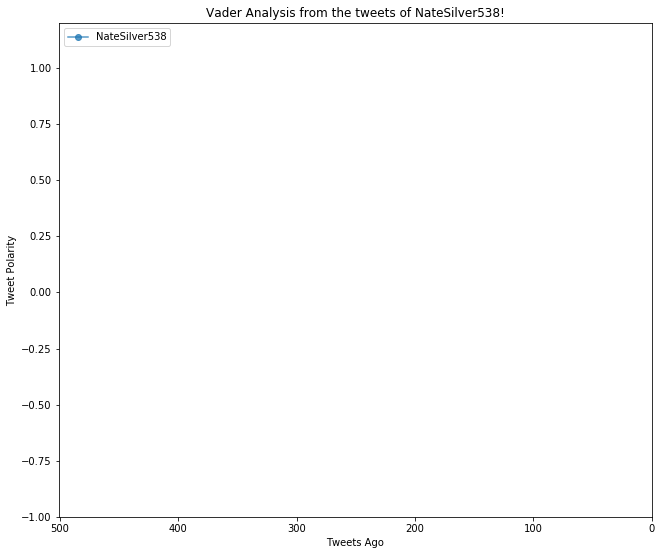

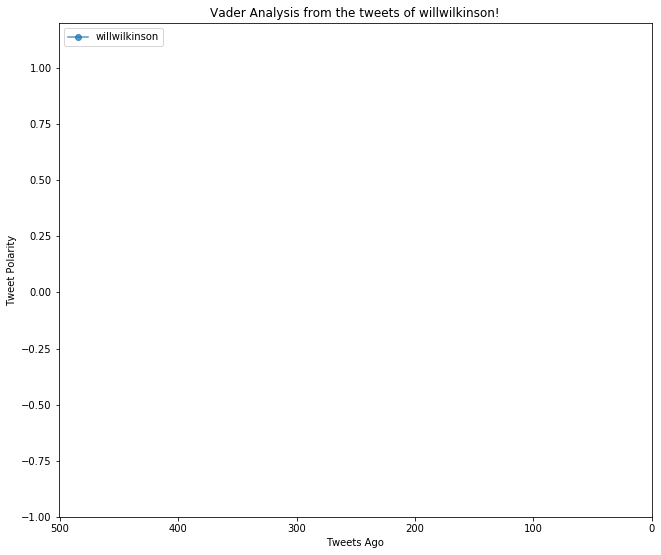

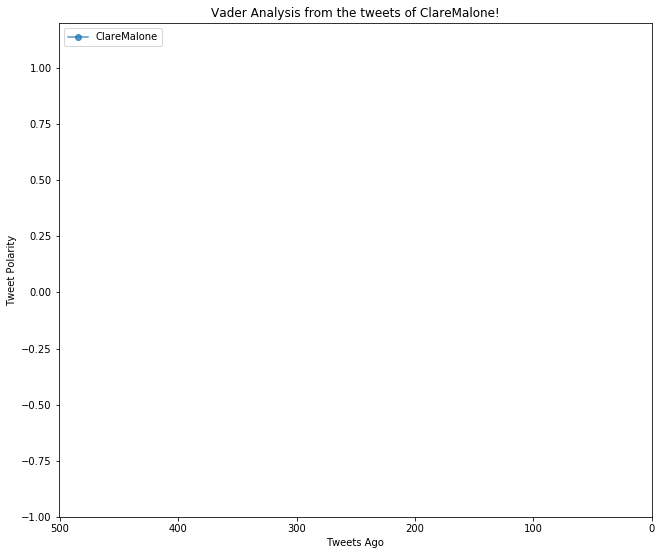

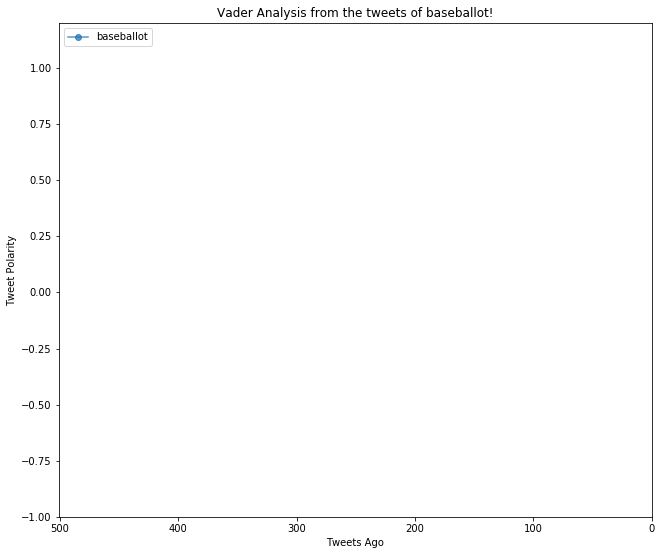

In [40]:
 for df in (drvox, nate, will, clare,rakich):
    fig, ax = plt.subplots()
    rects2 = ax.plot(df['Tweets Ago'], df['Compound Score'], marker="o",label=str(df.iloc[1,1]), alpha=0.75)
    ax.set_title(f'Vader Analysis from the tweets of {df.iloc[1,1]}!')
    ax.set_xlabel("Tweets Ago")
    ax.set_ylabel("Tweet Polarity")
    ax.set_xlim(501, 0)
    ax.set_ylim(-1, 1.2)
    ax.legend(loc='upper left')
    fig.tight_layout()
    fig.set_size_inches(10, 9)
    plt.savefig(f'{df.iloc[1,1]} Vader Analysis.png')
    fig.show()
    file = (f'{df.iloc[1,1]} Vader Analysis.png')
    imagePath = file
    status = f'Vader Analysis from @{df.iloc[1,1]}!'
    #api.update_with_media(imagePath, status)
    #print("Tweeted Succesfully!")
            

In [19]:
%whos
(drvox, nate, will, clare,rakich)

Variable                     Type                          Data/Info
--------------------------------------------------------------------
GraphTweets                  function                      <function GraphTweets at 0x118a91048>
SentimentIntensityAnalyzer   type                          <class 'vaderSentiment.va<...>timentIntensityAnalyzer'>
access_token                 str                           420018288-evQADYdqMoQffPz<...>c4NJvgSOXZLJPclIYSuGchc6R
access_token_secret          str                           aZECEJTcWgzZ4BrRWm4Mg7F7wPZEryvJFy7pOdVVo14gY
analyzer                     SentimentIntensityAnalyzer    <vaderSentiment.vaderSent<...>er object at 0x1185f3eb8>
api                          API                           <tweepy.api.API object at 0x118bcd240>
auth                         OAuthHandler                  <tweepy.auth.OAuthHandler object at 0x118bcd668>
consumer_key                 str                           DXO0bbdDlwl6R0ruG1MZWvbxS
consumer_secret         

In [37]:
rakich

index   User Name                      Time Stamp  \
19     99  baseballot  Thu Nov 07 22:38:43 +0000 2019   
18     98  baseballot  Thu Nov 07 23:22:42 +0000 2019   
17     97  baseballot  Fri Nov 08 00:55:43 +0000 2019   
16     96  baseballot  Fri Nov 08 01:38:52 +0000 2019   
15     95  baseballot  Fri Nov 08 03:52:19 +0000 2019   
14     94  baseballot  Fri Nov 08 03:52:29 +0000 2019   
13     93  baseballot  Fri Nov 08 16:32:24 +0000 2019   
12     92  baseballot  Fri Nov 08 16:33:18 +0000 2019   
11     91  baseballot  Fri Nov 08 19:28:50 +0000 2019   
10     90  baseballot  Fri Nov 08 21:50:30 +0000 2019   
9      89  baseballot  Fri Nov 08 22:00:53 +0000 2019   
8      88  baseballot  Fri Nov 08 22:29:00 +0000 2019   
7      87  baseballot  Fri Nov 08 23:58:09 +0000 2019   
6      86  baseballot  Sat Nov 09 00:00:14 +0000 2019   
5      85  baseballot  Sat Nov 09 00:24:38 +0000 2019   
4      84  baseballot  Mon Nov 11 15:51:57 +0000 2019   
3      83  baseballot  Mon Nov 11 15:53:36 +0000 2019   
2      82  baseballot  Mon Nov 11 16:53:57 +0000 2019   
1      81  baseballot  Mon Nov 11 17:26:06 +0000 2019   
0      80  baseballot  Mon Nov 11 19:02:30 +0000 2019   

                                        Text of Tweet  Compound Score  \
19  If Michael Bloomberg really wanted to stop War...          0.5770   
18  RT @gdebenedetti: One potential ramification h...          0.0000   
17  @Swydan Yes, this is impossibly late. Clinton ...          0.8555   
16                     #ALsen https://t.co/1BZjvq6qPs          0.0000   
15  RT @Taniel: Tonight's returns in the Washingto...         -0.3182   
14  RT @Taniel: Chesa Boudin cut his deficit in ha...         -0.5859   
13  This is fantastic news. Congrats, @leahaskarin...          0.8070   
12  @leahaskarinam And seriously, if you're follow...         -0.0900   
11  A win for San Juan's Navajo majority who just ...          0.5859   
10  It looks like Mike Coffman may not have won hi...         -0.1275   
9                What a world https://t.co/kpDoZ0oQbd          0.0000   
8                               @Evan_P_Grant Beltré?          0.0000   
7   RT @ByMikeBaker: There it is. Wow. \n\nAfter b...          0.5859   
6   RT @OlympiaJoe: BREAKING: Affirmative-action m...          0.4939   
5   Forgot to tweet this earlier, but here’s my de...          0.0000   
4   People have been predicting King's retirement ...          0.0000   
3   King's #NY02 has a FiveThirtyEight partisan le...          0.2617   
2   @micahcohen @Nate_Cohn @NateSilver538 @538poli...          0.0000   
1   @benswasey Ah, thanks, Ben, I missed that poll...          0.1779   
0   RT @micahcohen: Post-pod #NatesUnite now with ...          0.0000   

    Positive Score  Neutral Score  Negative Score  Tweets Ago  
19           0.242          0.662           0.096       -1900  
18           0.000          1.000           0.000       -1901  
17           0.255          0.711           0.034       -1902  
16           0.000          1.000           0.000       -1903  
15           0.000          0.905           0.095       -1904  
14           0.000          0.839           0.161       -1905  
13           0.593          0.407           0.000       -1906  
12           0.000          0.930           0.070       -1907  
11           0.202          0.798           0.000       -1908  
10           0.116          0.744           0.139       -1909  
9            0.000          1.000           0.000       -1910  
8            0.000          1.000           0.000       -1911  
7            0.167          0.833           0.000       -1912  
6            0.138          0.862           0.000       -1913  
5            0.000          1.000           0.000       -1914  
4            0.000          1.000           0.000       -1915  
3            0.144          0.750           0.105       -1916  
2            0.000          1.000           0.000       -1917  
1            0.221          0.611           0.168       

In [14]:
#def GraphTweets():
    #fig, ax = plt.subplots()
        #rects2 = ax.plot(df['Tweets Ago'], df['Compound Score'], marker="o",label=str(df.iloc[1,1]), alpha=0.75)
        #ax.set_title(f'Vader Analysis from the tweets of {df.iloc[1,1]}!')
        #ax.set_xlabel("Tweets Ago")
        #ax.set_ylabel("Tweet Polarity")
        #ax.set_xlim(501, 0)
        #ax.set_ylim(-1, 1.2)
        #ax.legend(loc='upper left')
        #fig.tight_layout()
        #fig.set_size_inches(10, 9)
        #plt.savefig(f'{df.iloc[1,1]} Vader Analysis.png')
        #fig.show()
        #file = (f'{df.iloc[1,1]} Vader Analysis.png')
        #imagePath = file
        #status = f'Vader Analysis from @{df.iloc[1,1]}!'
        #api.update_with_media(imagePath, status)
        #print("Tweeted Succesfully!")

In [32]:
GraphTweets()
    


RateLimitError: [{'message': 'Rate limit exceeded', 'code': 88}]

In [24]:
%whos

Variable                     Type                          Data/Info
--------------------------------------------------------------------
GraphTweets                  function                      <function GraphTweets at 0x1199c3c80>
SentimentIntensityAnalyzer   type                          <class 'vaderSentiment.va<...>timentIntensityAnalyzer'>
access_token                 str                           420018288-evQADYdqMoQffPz<...>c4NJvgSOXZLJPclIYSuGchc6R
access_token_secret          str                           aZECEJTcWgzZ4BrRWm4Mg7F7wPZEryvJFy7pOdVVo14gY
analyzer                     SentimentIntensityAnalyzer    <vaderSentiment.vaderSent<...>er object at 0x1185f3eb8>
api                          API                           <tweepy.api.API object at 0x118bcd240>
auth                         OAuthHandler                  <tweepy.auth.OAuthHandler object at 0x118bcd668>
consumer_key                 str                           DXO0bbdDlwl6R0ruG1MZWvbxS
consumer_secret         